In [2]:
from zipfile import ZipFile
dataset = '/content/archive (1).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted.')

Extracted.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2833.jpg', 'with_mask_3689.jpg', 'with_mask_964.jpg', 'with_mask_3272.jpg', 'with_mask_954.jpg']
['with_mask_3698.jpg', 'with_mask_3360.jpg', 'with_mask_2419.jpg', 'with_mask_1835.jpg', 'with_mask_3610.jpg']


In [5]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3474.jpg', 'without_mask_2274.jpg', 'without_mask_1506.jpg', 'without_mask_2350.jpg', 'without_mask_2490.jpg']
['without_mask_627.jpg', 'without_mask_2313.jpg', 'without_mask_1183.jpg', 'without_mask_1492.jpg', 'without_mask_1887.jpg']


In [6]:
print('Number of with mask:',len(with_mask_files))
print('Number of without mask:', len(without_mask_files))

Number of with mask: 3725
Number of without mask: 3828


In [7]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


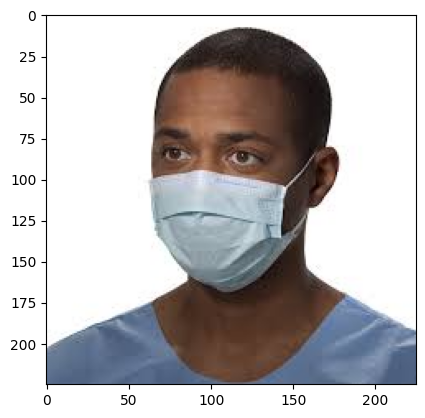

In [9]:
img = mpimg.imread('/content/data/with_mask/with_mask_2833.jpg')
imgplot = plt.imshow(img)
plt.show()

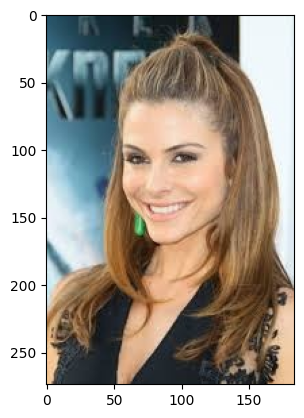

In [10]:
img = mpimg.imread('/content/data/without_mask/without_mask_627.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
type(data)

list

In [14]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 93, 112, 144],
        [ 92, 111, 142],
        [ 89, 108, 140],
        ...,
        [ 79,  98, 130],
        [ 79,  98, 130],
        [ 77,  96, 127]],

       [[ 91, 110, 142],
        [ 89, 108, 140],
        [ 87, 106, 138],
        ...,
        [ 79,  98, 130],
        [ 79,  98, 130],
        [ 77,  96, 126]],

       [[ 91, 110, 139],
        [ 90, 109, 139],
        [ 87, 106, 137],
        ...,
        [ 82,  99, 127],
        [ 82,  99, 127],
        [ 80,  98, 127]]], dtype=uint8)
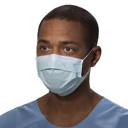

In [15]:
data[0]

In [16]:
type(data[0])

numpy.ndarray

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
X = np.array(data)
Y = np.array(labels)

In [19]:
type(X)

numpy.ndarray

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape,X_test.shape,X_train.shape)

(7553, 128, 128, 3) (1511, 128, 128, 3) (6042, 128, 128, 3)


In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
 print(X_train_scaled[0])

[[[0.34509804 0.11764706 0.10196078]
  [0.37647059 0.14509804 0.13333333]
  [0.40392157 0.17254902 0.16470588]
  ...
  [0.05882353 0.0627451  0.09019608]
  [0.05882353 0.0627451  0.08235294]
  [0.0627451  0.06666667 0.08627451]]

 [[0.36470588 0.12156863 0.10196078]
  [0.4        0.16078431 0.14901961]
  [0.42352941 0.18431373 0.18039216]
  ...
  [0.0627451  0.0627451  0.09411765]
  [0.05098039 0.05098039 0.08235294]
  [0.05882353 0.0627451  0.08235294]]

 [[0.42745098 0.16862745 0.15294118]
  [0.46666667 0.21176471 0.19607843]
  [0.48627451 0.23137255 0.22745098]
  ...
  [0.07843137 0.07843137 0.10980392]
  [0.0745098  0.0745098  0.10588235]
  [0.07058824 0.07058824 0.10196078]]

 ...

 [[0.6745098  0.23529412 0.23137255]
  [0.68235294 0.24313725 0.24313725]
  [0.6745098  0.25098039 0.25098039]
  ...
  [0.55294118 0.41176471 0.36078431]
  [0.56078431 0.41960784 0.36470588]
  [0.56470588 0.42352941 0.36862745]]

 [[0.6745098  0.23921569 0.23137255]
  [0.68235294 0.25098039 0.24705882]


In [26]:
import tensorflow as tf
import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])



In [38]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9607 - loss: 0.1057 - val_acc: 0.9223 - val_loss: 0.2006
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9679 - loss: 0.0837 - val_acc: 0.9240 - val_loss: 0.2246
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9818 - loss: 0.0551 - val_acc: 0.9207 - val_loss: 0.2431
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9789 - loss: 0.0537 - val_acc: 0.9388 - val_loss: 0.2166
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9793 - loss: 0.0501 - val_acc: 0.9256 - val_loss: 0.2949
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9859 - loss: 0.0367 - val_acc: 0.9174 - val_loss: 0.3150
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9812 - loss: 0.0525 - val_acc: 0.9240 - val_loss: 0.2565
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9902 - loss: 0.0306 - val_acc: 0.9207 - val_loss: 0.3552
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/

In [39]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy: ', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9360 - loss: 0.3627
Test Accuracy:  0.9331568479537964


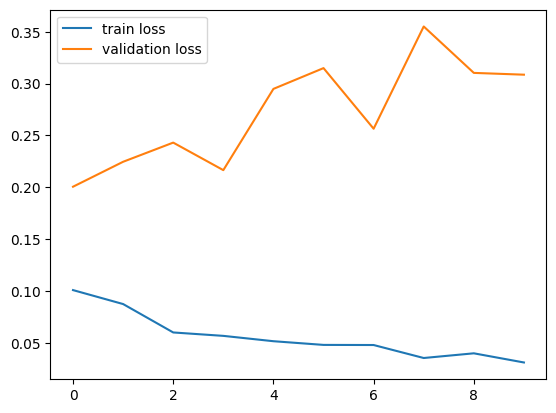

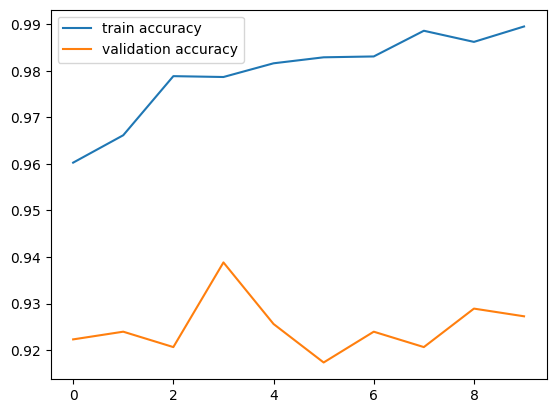

In [40]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/data/without_mask/without_mask_1012.jpg


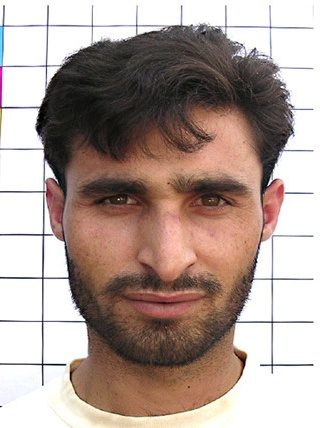

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.7430268e-04 9.9833304e-01]]
1
The person is wearing a mask.


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person is wearing a mask.')
else:
  print('The person is not wearing a mask')